In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [196]:
df = pd.read_csv('/kaggle/input/sf-pricedata/Testing-Training Data - Sheet1.csv')
#df.head()
df2 = pd.read_csv('/kaggle/input/prediction/Prediction-Data.csv')
#df.2.head()
df.dropna(inplace=True)  # drop rows
df2.dropna(inplace=True)  # drop columns
df.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

In [197]:
df.columns = [col.strip().lower() for col in df.columns]
x = df['sfvalue'].values  
y = df['bitcoinprice'].values 
df2.columns = [col.strip().lower() for col in df2.columns]
x2 = df2['sfvalue'].values  
y2 = df2['bitcoinprices'].values 

In [198]:
# Logarithm bases and constants
alpha = 3
beta = 27
omega = 351/463

# Compute logarithmic transformations
log_beta_x = np.log(x) / np.log(beta)     # log_beta(x)
log_beta_x2 = np.log(x2) / np.log(beta)     # log_beta(x2)
log_alpha_y = np.log(y) / np.log(alpha)   # log_alpha(y)
log_alpha_y2 = np.log(y2) / np.log(alpha)   # log_alpha(y2)

In [199]:
N = len(x)
print(N)
A = np.sum(log_beta_x ** 2)
B = np.sum(log_alpha_y ** 2)
C = 2 * np.sum(log_beta_x)
D = 2 * np.sum(log_alpha_y)
E = 2 * np.sum(log_beta_x * log_alpha_y)

351


In [200]:
denominator = (4 * N * A - C ** 2)

m_star = (2 * N * E - C * D) / denominator
q_star = (np.log(omega)/np.log(beta))- (C * E - 2 * A * D) / denominator


In [201]:
log_y_pred = m_star * log_beta_x + q_star
y_pred = alpha ** log_y_pred  # Reverse log to get predicted price

In [202]:
from sklearn.metrics import mean_squared_error, r2_score

# RMSE and R2 use original y and predicted y
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE (Root Mean Squared Error): 12956.68
R² Score: 0.3305


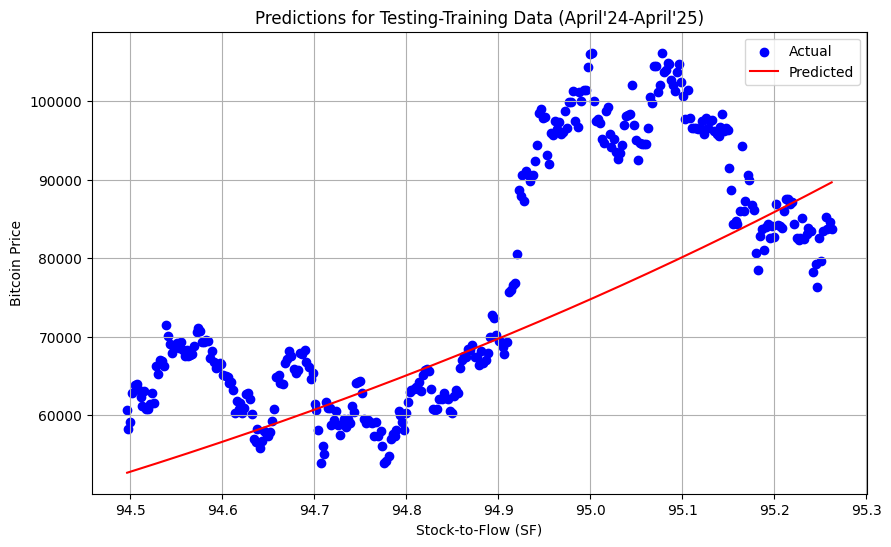

In [203]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Actual')
plt.plot(x, y_pred, color='red', label='Predicted')
plt.xlabel('Stock-to-Flow (SF)')
plt.ylabel('Bitcoin Price')
plt.title("Predictions for Testing-Training Data (April'24-April'25)")
plt.legend()
plt.grid(True)
plt.show()

In [204]:
log_y_pred = m_star * log_beta_x2 + q_star
y_pred = alpha ** log_y_pred  # Reverse log to get predicted price

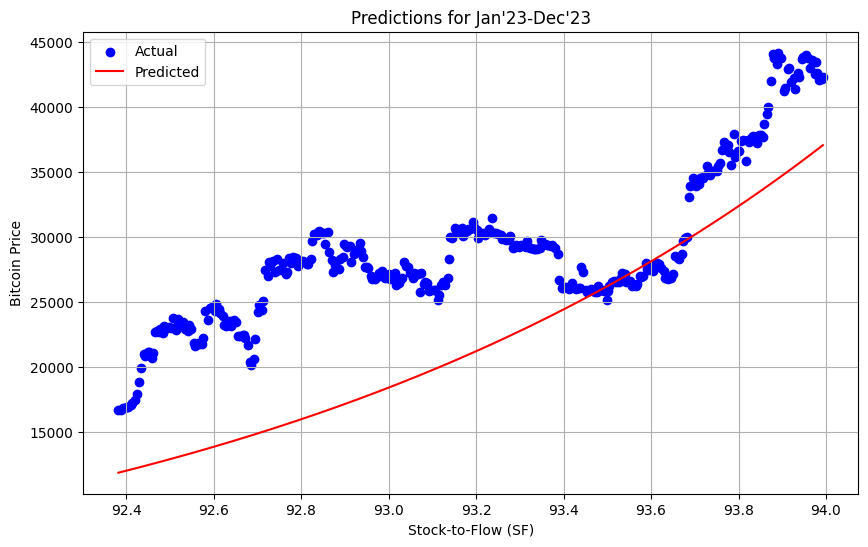

In [205]:
plt.figure(figsize=(10, 6))
plt.scatter(x2, y2, color='blue', label='Actual')
plt.plot(x2, y_pred, color='red', label='Predicted')
plt.xlabel('Stock-to-Flow (SF)')
plt.ylabel('Bitcoin Price')
plt.title("Predictions for Jan'23-Dec'23")
plt.legend()
plt.grid(True)
plt.show()

In [206]:
rmse = np.sqrt(mean_squared_error(y2, y_pred))
r2 = r2_score(y2, y_pred)

print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

RMSE (Root Mean Squared Error): 7810.99
R² Score: -0.7738
